In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import imageio
from numba import jit

In [7]:
def gen_spin_field(L):
    a=np.zeros((L,L))
    for i in range(L):
        for j in range(L):
            a[i,j] = np.random.choice([-1,1])
    return a

In [8]:
@jit(nopython = True)
def mcmove(field, T):
    L = len(field)
    for i in range(L):
        for j in range(L):
                x = np.random.randint(0, L)
                y = np.random.randint(0, L)
                spin =  field[x, y]
                nb = field[(x+1)%L,y] + field[x,(y+1)%L] + field[(x-1)%L,y] + field[x,(y-1)%L]
                dE = 2*spin*nb
                if dE < 0:
                    spin *= -1
                elif np.random.random() < np.exp(-dE/T):
                    spin *= -1
                field[x, y] = spin
    return field

In [9]:
def simulate(L):   
    config = gen_spin_field(L)
    filenames=[]
    images =[]    
    mcsteps = 10**4 + 1
    for i in range(mcsteps):
        mcmove(config, 4)
        if i == 0:
            X, Y = np.meshgrid(range(L+1), range(L+1))     
            plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu)
            plt.title('Time=%d'%i + ' L =%d'%L + ' T = 4'); plt.axis('tight')
            filenames.append('1.png')
            plt.savefig('1.png')
            plt.show()
        if i == 4:
            X, Y = np.meshgrid(range(L+1), range(L+1))     
            plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu)
            plt.title('Time=%d'%i + ' L =%d'%L + ' T = 4'); plt.axis('tight')
            filenames.append('2.png')
            plt.savefig('2.png')
            plt.show()
        if i == 32:
            X, Y = np.meshgrid(range(L+1), range(L+1))     
            plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu)
            plt.title('Time=%d'%i + ' L =%d'%L + ' T = 4'); plt.axis('tight')
            filenames.append('3.png')
            plt.savefig('3.png')
            plt.show() 
        if i == 100:
            X, Y = np.meshgrid(range(L+1), range(L+1))     
            plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu)
            plt.title('Time=%d'%i + ' L =%d'%L + ' T = 4'); plt.axis('tight')
            filenames.append('4.png')
            plt.savefig('4.png')
            plt.show()
        if i == 1000:
            X, Y = np.meshgrid(range(L+1), range(L+1))     
            plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu)
            plt.title('Time=%d'%i + ' L =%d'%L + ' T = 4'); plt.axis('tight')
            filenames.append('5.png')
            plt.savefig('5.png')
            plt.show()
        if i == 2000:
            X, Y = np.meshgrid(range(L+1), range(L+1))     
            plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu)
            plt.title('Time=%d'%i + ' L =%d'%L + ' T = 4'); plt.axis('tight')
            filenames.append('6.png')
            plt.savefig('6.png')
            plt.show()
        if i == 5000:
            X, Y = np.meshgrid(range(L+1), range(L+1))     
            plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu)
            plt.title('Time=%d'%i + ' L =%d'%L + ' T = 4'); plt.axis('tight')
            filenames.append('7.png')
            plt.savefig('7.png')
            plt.show()
        if i == 10**4:
            X, Y = np.meshgrid(range(L+1), range(L+1))     
            plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu)
            plt.title('Time=%d'%i + ' L =%d'%L + ' T = 4'); plt.axis('tight')
            filenames.append('8.png')
            plt.savefig('8.png')
            plt.show()
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('xd.gif', images, fps=1)

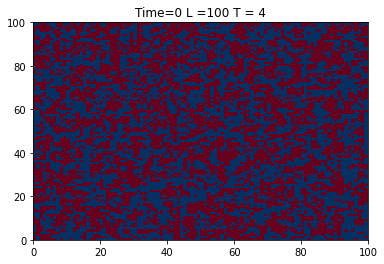

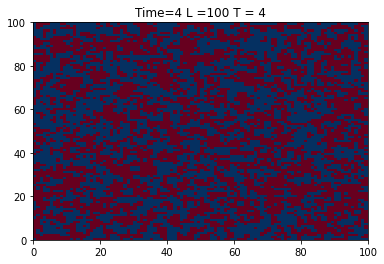

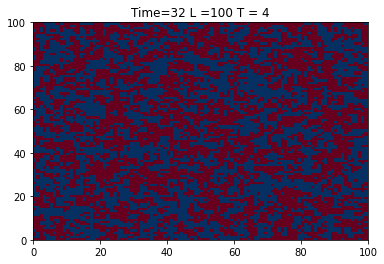

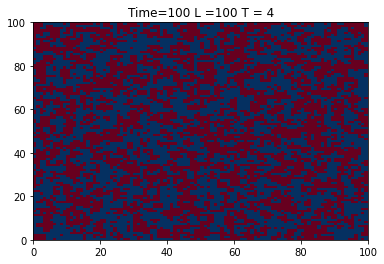

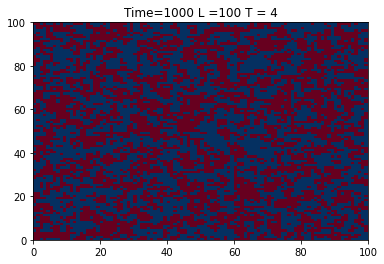

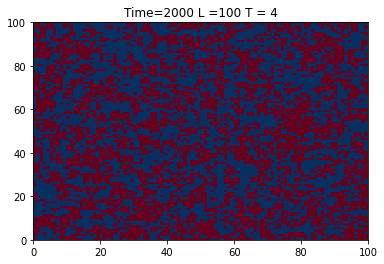

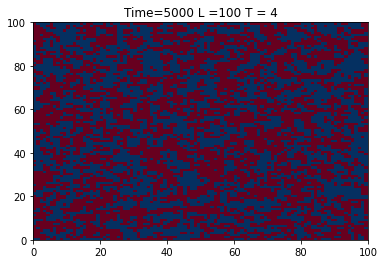

KeyboardInterrupt: 

In [10]:
simulate(100)

In [11]:
@jit(nopython = True)
def calcul_mag2(field):
    mag = np.sum(field)
    return mag/(len(field)**2)

In [12]:
calcul_mag2(gen_spin_field(100))

-0.0134

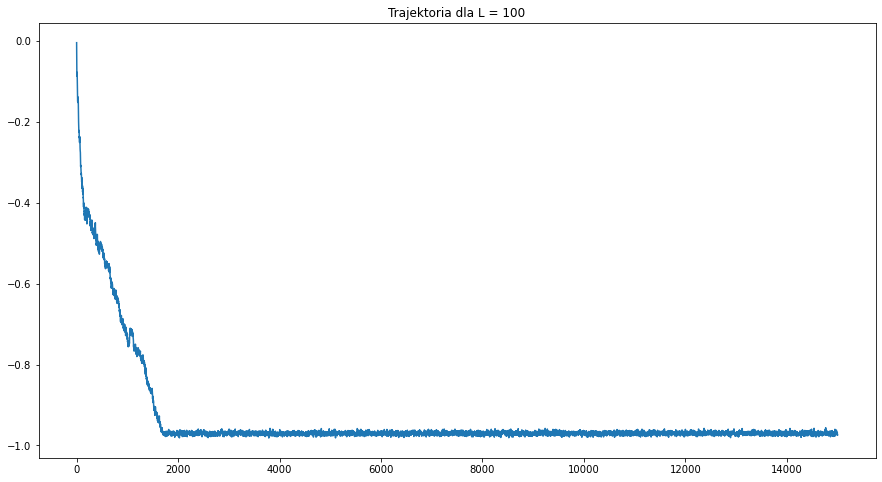

0.9999399714285456


In [13]:
mag = []
mcsteps = 15001
field = gen_spin_field(100)
L = len(field)
for i in range(mcsteps):
    mcmove(field,1.7)
    mag.append(calcul_mag2(field))
sr = sum(np.absolute(mag))/(mcsteps - 1 - 10**3)
plt.figure(figsize=(15, 8))
plt.plot(list(range(mcsteps)), mag)
plt.title("Trajektoria dla L = %d"%L)
plt.savefig("Trajektoria L_100.png")
plt.show()
print(sr)

In [14]:
def aver_mag(field, T, mcsteps):
    mag = []
    for i in range (mcsteps):
        mcmove(field,T)
        mag.append(calcul_mag2(field))
    aver = sum(np.absolute(mag))/(mcsteps - 10**4)
    return aver

In [25]:
def aver_susc(field, T, mcsteps):
    mag = 0
    mag2 = 0
    aver_susc = 0
    for i in range(mcsteps):
        mcmove(field, T)
        magn = calcul_mag2(field)
        mag = mag + magn
        mag2 = mag + magn*magn
    X = (mag2/(mcsteps*len(field)**2) - mag**2/(mcsteps**2*len(field)**2))
    return X

In [11]:
def magnet(tp = 25, mcsteps = 15001):
    L = [10, 50, 100]
    T = np.linspace(1,3.5,tp)
    mcsteps = 15001
    mag = []
    av_mag_10 = []
    av_mag_50 = []
    av_mag_100 = []
    for l in L:
        field = gen_spin_field(l)
        for x in T:
            if l == 10:
                av_mag_10.append(aver_mag(field, x, mcsteps))
            if l == 50:
                av_mag_50.append(aver_mag(field, x, mcsteps))
            if l == 100:
                av_mag_100.append(aver_mag(field, x, mcsteps))
    plt.figure(figsize=(15, 8))
    plt.scatter(T, av_mag_10)
    plt.scatter(T, av_mag_50)
    plt.scatter(T, av_mag_100)
    plt.legend(L)
    plt.title("<m>(T)")
    plt.savefig("M(T).png")
    plt.show()
    

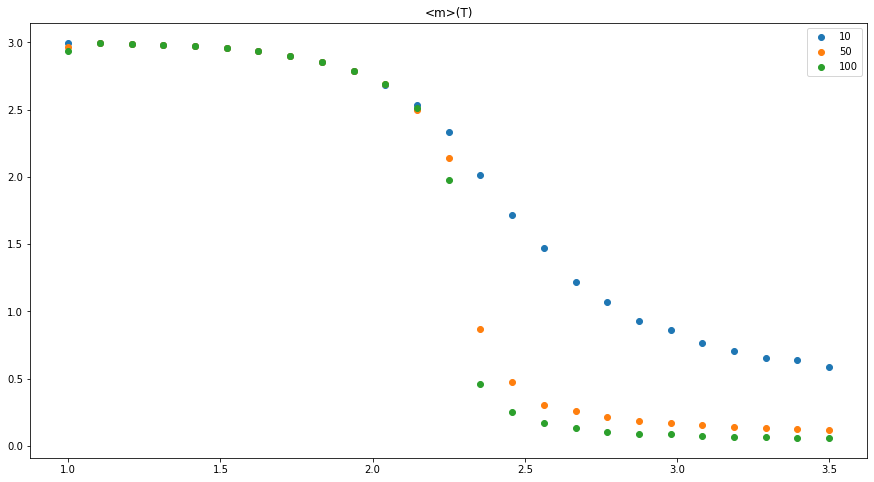

In [12]:
magnet()

In [26]:
def susc_mag(tp = 25, mcsteps = 25001):
    L = [10, 50, 100]
    T = np.linspace(1,3.5,tp)
    av_susc_10 = []
    av_susc_50 = []
    av_susc_100 = []
    
    for l in L:
        field = gen_spin_field(l)
        for x in T:
            if l == 10:
                av_susc_10.append(aver_susc(field, x, mcsteps))
            if l == 50:
                av_susc_50.append(aver_susc(field, x, mcsteps))
            if l == 100:
                av_susc_100.append(aver_susc(field, x, mcsteps))
    plt.figure(figsize=(15, 8))
    plt.scatter(T, av_susc_10)
    plt.scatter(T, av_susc_50)
    plt.scatter(T, av_susc_100)
    plt.legend(L)
    plt.title("X(T)")
    plt.savefig("X(T).png")
    plt.show()

In [ ]:
susc_mag()